<h1><p style="display: block; text-align: center;">Plan Your Next Eclipse Viewing</p></h1>

<h3><p style="display: block; text-align: center;">with Jupyter and Geopandas</p></h3>

<h5><p style="display: block; text-align: center;">Christy Heaton</p></h5>

<h1><p style="display: block; text-align: center;">About me</p></h1>

![title](img/FS_bio.PNG) 

![title](img/maptimeseattle_website.PNG) 

Find us on [Meetup!](https://www.meetup.com/MaptimeSEA)

<h1><p style="display: block; text-align: center;">This presentation is running inside of a Jupyter Notebook</p></h1>

In [1]:
import platform
print('Hello world! We are Using Python version', platform.python_version())

Hello world! We are Using Python version 3.7.10


<h1>Maps are Cool!</h1>

![title](img/wmata-metro-map.jpg) 

https://washington-org.s3.amazonaws.com/s3fs-public/styles/editorial_wide/public/wmata-metro-map.jpg

![title](img/CLE_1852.PNG) 

Historic Cleveland Map Source: https://www.arcgis.com/apps/View/index.html?appid=ddb0ee6134d64de4adaaa3660308abfd

<h2><p style="display: block; text-align: center;">Hasn't Everything Already Been Mapped?</p></h2>

![title](img/nearmap_CLE.PNG) 

Source: [Nearmap](https://go.nearmap.com/)

![title](img/stamen_maps.PNG) 

Source: [Stamen](http://maps.stamen.com/#terrain/13/41.5001/-81.6755)

![title](img/Climate-destabilisation.jpg) 

Source: [Geoawesomeness](https://i1.wp.com/geoawesomeness.com/wp-content/uploads/2016/10/Climate-destabilisation.jpg?fit=1303%2C766)

## Non-Earth Maps

![title](img/frodo_middleearth.jpg)

Middle Earth Map Source: https://www.reddit.com/r/lotr/comments/1870r9/map_of_characters_paths_through_the_books_my/

## What is a Geographic Information System (GIS)?

* A system that allows you to visualize, analyze, and store data to understand spatial relationships, patterns, and trends

* GIS is widely used in organizations of all sizes and in almost every industry

* A mix of data, science, analysis, and maps

## We use GIS to Answer _Where_ Questions

* Where is the Convention Center and how do I get there?

* Where should we build a store/wind turbine/solar panel?

* Where will the hurricane hit and what cities will be impacted?

* Where is the highest concentration of arsenic in our port?

* Where should we place advertisements so that people see them who are most likely to buy our product?

# Spatial Data - A Few Things to Know

![title](img/projection.png) 

## Depending on what projection you choose, you will get distortion in:

* Area
* Angles
* Shape
* Distance
* Direction


![title](img/map-projections.jpg) 

<h2>Coordinate Systems</h2>

![title](img/CoordSysPlane.png) 

![title](img/Geog_vs_Projected_CRS.png)

<h2>Geographic/Unprojected Coordinate System</h2>

![title](img/latlong-150.JPG)

![title](img/null_island_round.png)

![title](img/null_island_flat.png)

![title](img/epsgIO.png)

Source: [epsg.io](http://epsg.io/)

# Spatial Problem: In what cities will we be able to see upcoming solar eclipses?

![title](img/Christy_eclipse.jpg)

![title](img/_alignment-lines-720.png)

![title](img/Corona-2017-Aug-21-m.jpg)

### What does she want to know?

1.  When and where will she be able to see an eclipse?

2.  Which upcoming eclipse will pass over the most people?

3.  What are the largest cities in that eclipse?


# Python Mapping Libraries

## [Matplotlib](https://matplotlib.org/)

#### A Python plotting library which produces publication quality maps and diagrams in both static and interactive formats. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## [Pandas](https://pandas.pydata.org/)

#### Provides high-performance, easy-to-use data structures and data analysis tools

## [GeoPandas](http://geopandas.org/)

#### Geographically-enabled Pandas, depends on [Shapely](https://github.com/Toblerity/Shapely) for manipulation and analysis of planar geometric objects

In [3]:
import pandas as pd
import geopandas as gpd

# Let's Start by Making a Simple Map

In [4]:
# GeoPandas comes with some data that we can quickly load in
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# And check out the top few rows - notice it comes with some attributes like population and geometry 
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

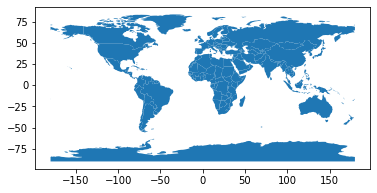

In [7]:
# Use the plot method to view the spatial component
world.plot()

<AxesSubplot:>

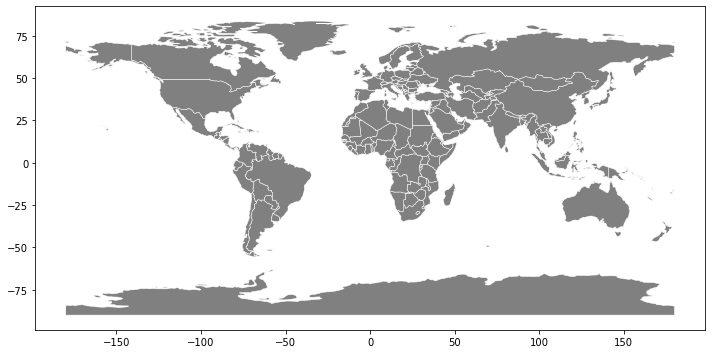

In [8]:
 # You'll usually want to customize how your map looks
world.plot(color='grey', linewidth=0.5, edgecolor='white', figsize=(12,10))

In [9]:
# We'll need to load in some local data
import os
data_pth = "../Data/" 

In [10]:
# GeoPandas comes with city data, but its just the capital cities, so I'll load in my own
cities = gpd.read_file(os.path.join(data_pth, "ne_10m_populated_places.shp"))

In [11]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# View the top few rows
cities.head()

,NAME,ADM0NAME,POP,geometry
0,Colonia del Sacramento,Uruguay,21714,POINT (-57.84000 -34.48000)
1,Trinidad,Uruguay,21093,POINT (-56.90100 -33.54400)
2,Fray Bentos,Uruguay,23279,POINT (-58.30400 -33.13900)
3,Canelones,Uruguay,19698,POINT (-56.28400 -34.53800)
4,Florida,Uruguay,32234,POINT (-56.21500 -34.09900)


<AxesSubplot:>

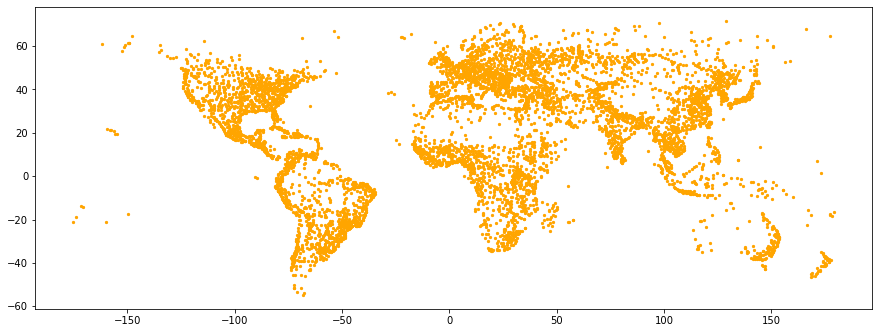

In [13]:
# And plot to view the spatial component
cities.plot(figsize=(15,10), color='orange', markersize=5)

In [14]:
world.crs == cities.crs

True

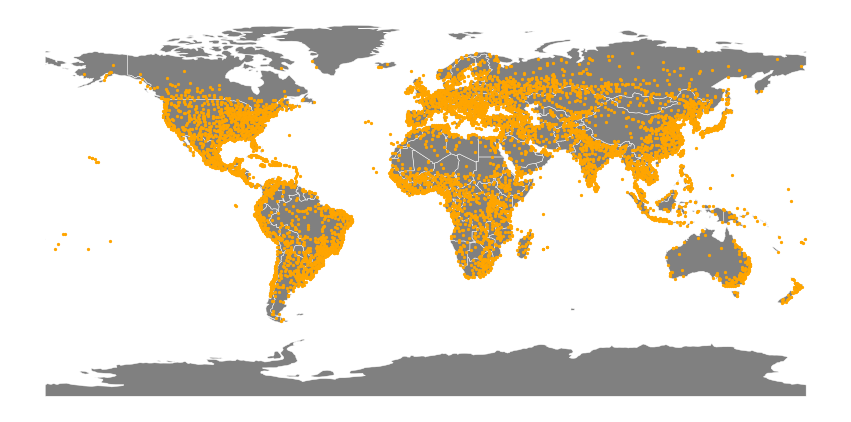

In [15]:
base = world.plot(color='grey', linewidth=0.5, edgecolor='white', figsize=(15,10))
cities.plot(ax=base, color='orange', markersize=5)
base.set_axis_off() 

### What does she want to know?

1.  When and where will she be able to see an eclipse?


In [16]:
# Load in Eclipse data
eclipses = gpd.read_file(os.path.join(data_pth, "Eclipses.shp"))

In [19]:
# Check the coorindate reference system
eclipses.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
eclipses = eclipses.to_crs('EPSG:4326')

In [17]:
# Examine the first few rows
eclipses.head()

,Year,geometry
0,2017,"POLYGON Z ((-171.57693 39.73810000000003 0, -1..."
1,2019,"POLYGON Z ((-160.39845 -37.64846999999997 0, -..."
2,2020,"POLYGON Z ((-132.81568 -7.773699999999963 0, -..."
3,2021,POLYGON Z ((-51.18286999999998 -53.08708999999...
4,2023,POLYGON Z ((180.0000000000001 3.21677000000005...


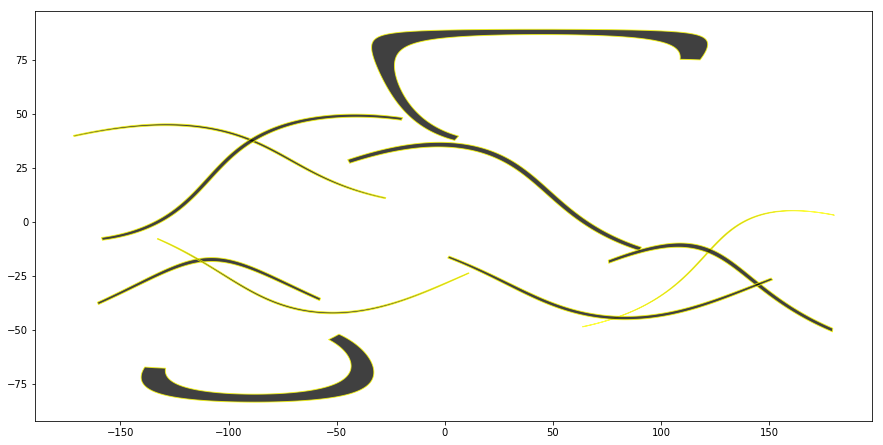

In [18]:
# And let's plot with a customized style
eclipses.plot(figsize=(15,10), color='black', edgecolor='yellow', alpha=0.75)

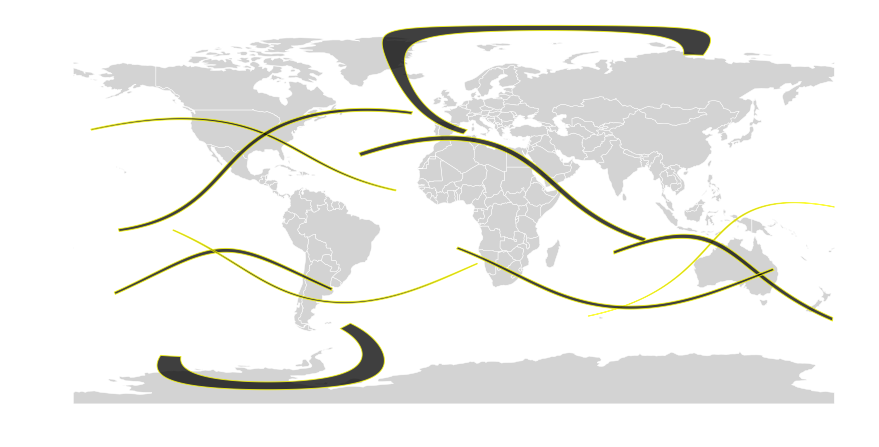

In [19]:
# Let's plot the eclipses on top of our world data
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
base.set_axis_off()

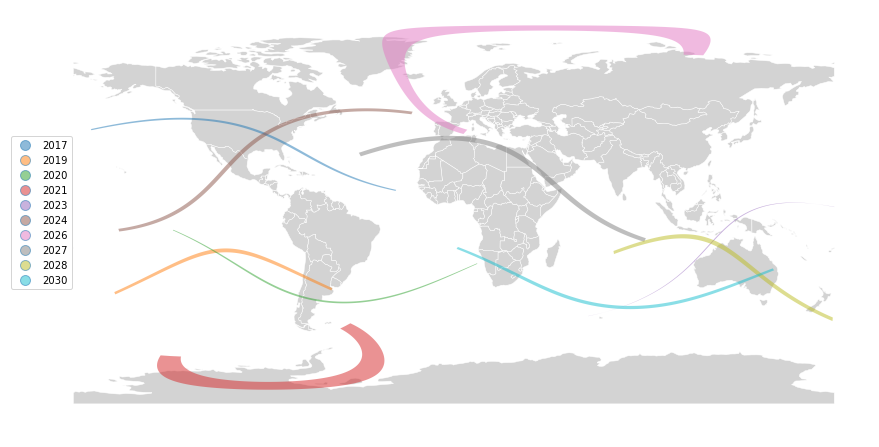

In [20]:
# But how do we know which is which?
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))

# We can add a catetorical value and set the column to Year. We can also add a legend.
eclipses.plot(ax=base, cmap='tab10', alpha=0.5, categorical = True, column = "Year", legend=True)
base.set_axis_off()
base.get_legend().set_bbox_to_anchor((.05,.7))

### What does she want to know?

1.  When and where will she be able to see an eclipse?

2.  What upcoming eclipse will pass over the most people?

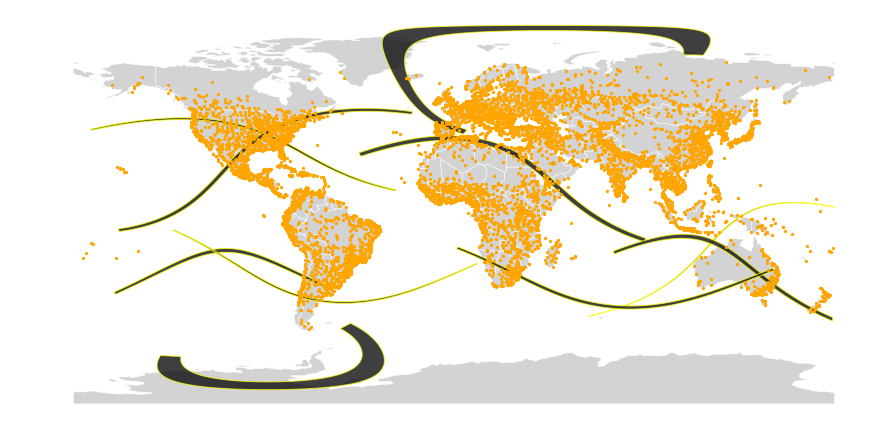

In [21]:
# Now we'll plot our basemap, our eclipse paths, and our cities
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(ax=base, color='orange', markersize=5)
base.set_axis_off()

In [22]:
# Start by getting all the cities that intersect any eclipse, a spatial join using the geom column
all_e_cities = gpd.sjoin(cities, eclipses, how='inner', op='intersects')

In [23]:
all_e_cities.head()

,NAME,ADM0NAME,POP,geometry,index_right,Year
12,Kasserine,Tunisia,76243,POINT (8.716698503320458 35.21670310482421),7,2027
13,Sdid Bouzid,Tunisia,42098,POINT (9.500004482255633 35.01669607914971),7,2027
15,Mahdia,Tunisia,45977,POINT (11.04087661532196 35.48391304450269),7,2027
427,Bordj Bou Arréridj,Algeria,140000,POINT (4.629996466405032 36.05900400826653),7,2027
428,M'sila,Algeria,150000,POINT (4.545000583879414 35.70000309604808),7,2027


In [24]:
all_e_cities = pd.DataFrame(all_e_cities[['POP', 'Year']])

In [25]:
all_e_cities.head()

,POP,Year
12,76243,2027
13,42098,2027
15,45977,2027
427,140000,2027
428,150000,2027


In [26]:
# Create a temporary variable to hold our years and populations
temp_df = all_e_cities.groupby(['Year'])[["POP"]].sum()

In [27]:
temp_df

,POP
Year,
2017,6259810
2019,1064173
2020,352237
2023,103610
2024,27774481
2026,5410608
2027,22032732
2028,5175798
2030,4784330


In [28]:
# Add that column to our eclipse data, joining on the Year column
eclipses_pop = pd.merge(eclipses, temp_df, left_on='Year', right_index=True)

In [29]:
# Now we have populations associated with each eclipse
eclipses_pop.head()

,Year,geometry,POP
0,2017,"POLYGON Z ((-171.57693 39.73810000000003 0, -1...",6259810
1,2019,"POLYGON Z ((-160.39845 -37.64846999999997 0, -...",1064173
2,2020,"POLYGON Z ((-132.81568 -7.773699999999963 0, -...",352237
4,2023,POLYGON Z ((180.0000000000001 3.21677000000005...,103610
5,2024,"POLYGON Z ((-158.5096 -7.820039999999949 0, -1...",27774481


In [30]:
# Sort the results to find out which eclipse will cover the most people
eclipses_pop.sort_values('POP', ascending = False)

,Year,geometry,POP
5,2024,"POLYGON Z ((-158.5096 -7.820039999999949 0, -1...",27774481
7,2027,POLYGON Z ((-44.46105999999997 27.958530000000...,22032732
0,2017,"POLYGON Z ((-171.57693 39.73810000000003 0, -1...",6259810
6,2026,POLYGON Z ((113.4735000000001 75.0838800000000...,5410608
8,2028,POLYGON Z ((75.66460000000018 -18.383469999999...,5175798
9,2030,POLYGON Z ((1.61298000000005 -16.2127899999999...,4784330
1,2019,"POLYGON Z ((-160.39845 -37.64846999999997 0, -...",1064173
2,2020,"POLYGON Z ((-132.81568 -7.773699999999963 0, -...",352237
4,2023,POLYGON Z ((180.0000000000001 3.21677000000005...,103610


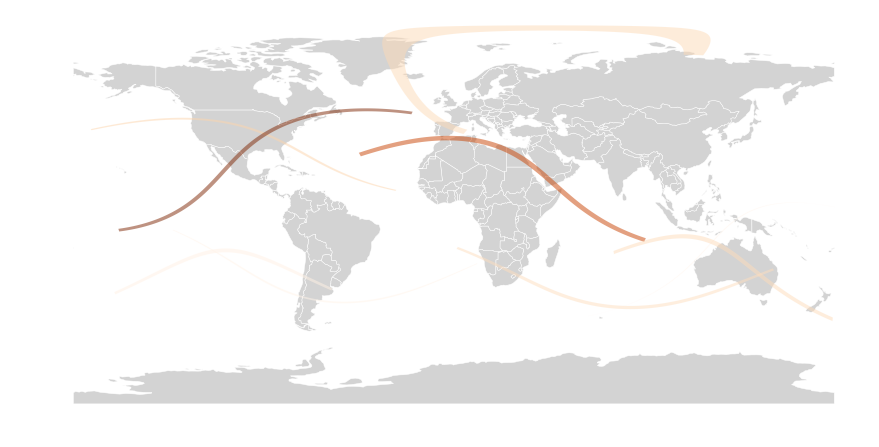

In [31]:
# Let's plot this
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses_pop.plot(ax=base, cmap='Oranges', alpha=0.5, column = "POP")
base.set_axis_off()

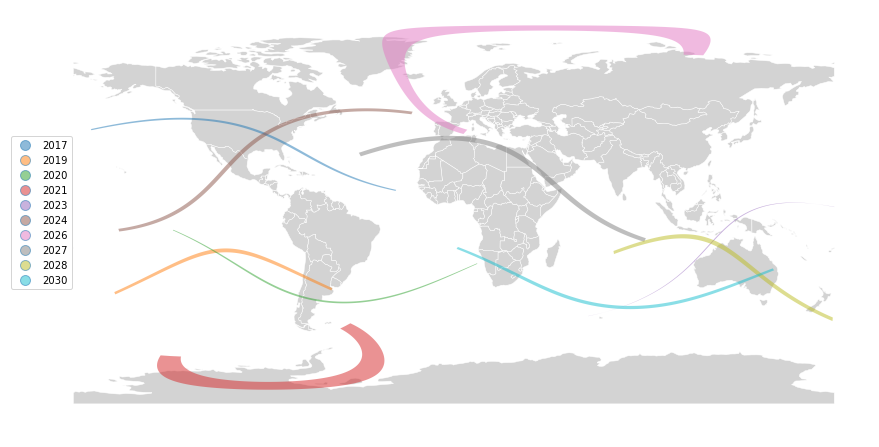

In [32]:
# As we saw earlier, this eclipse is happening in 2024
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
eclipses.plot(ax=base, cmap='tab10', alpha=0.5, categorical = True, column = "Year", legend=True)
base.set_axis_off()
base.get_legend().set_bbox_to_anchor((.05,.7))

### What does she want to know?

1.  When and where will she be able to see an eclipse?

2.  What upcoming eclipse will pass over the most people?

3.  What are the largest cities in that eclipse?


In [33]:
# Let's assign the 2024 eclipse to its own variable
my_eclipse = eclipses[(eclipses['Year'] == 2024)]

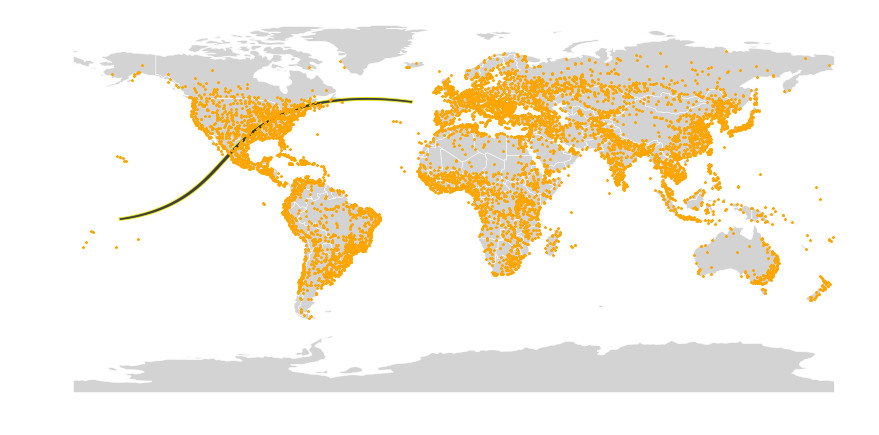

In [34]:
# Let's plot it 
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
my_eclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(marker='*', color='orange', markersize=5, ax=base)
base.set_axis_off()

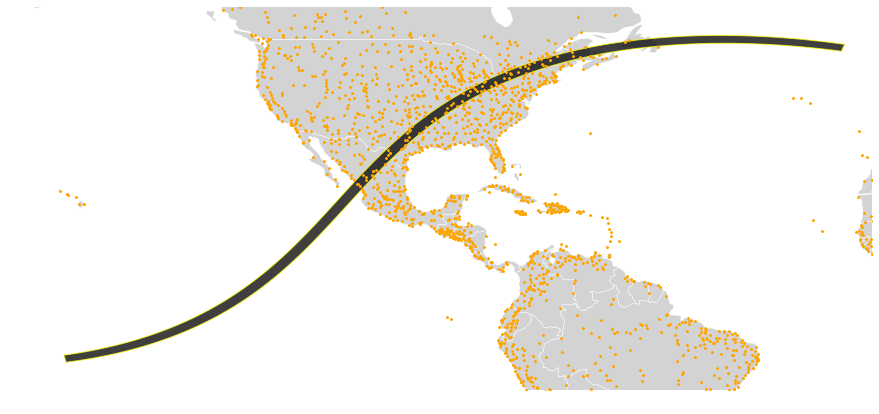

In [35]:
# Plot again, but this time I want to zoom in on that eclipse path
base = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,10))
my_eclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(marker='*', color='orange', markersize=5, ax=base)
bounds = my_eclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

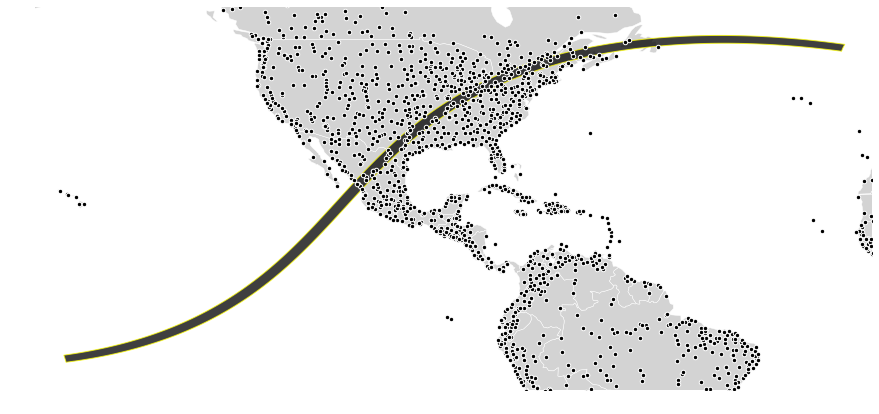

In [36]:
# Let's style the plot so that the eclipse looks eclipse-ier
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,10))
my_eclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
cities.plot(ax=base, color='black', markersize=20, edgecolor='white')
bounds = my_eclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

In [37]:
# We can see that there are quite a few cities that intersect my path! But we want to know which ones.
# Do a spatial join to get the intersection
e_cities = gpd.sjoin(cities, my_eclipse, how='inner', op='intersects')

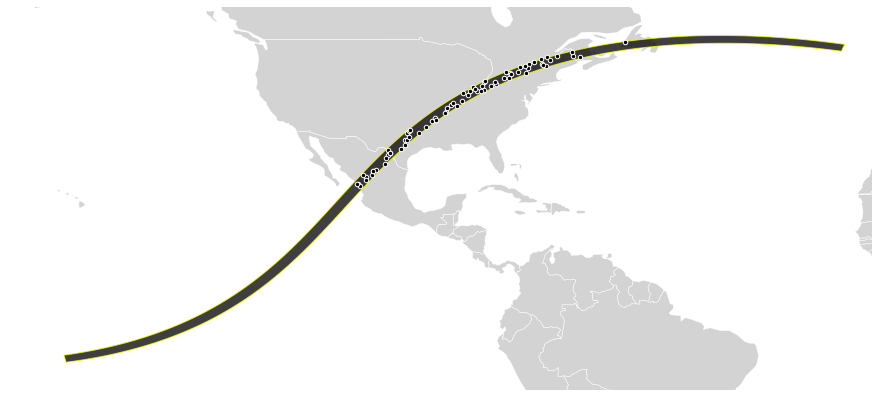

In [38]:
# Let's plot the results!
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,10))
my_eclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
e_cities.plot(ax=base, color='black', markersize=20, edgecolor='white')
bounds = my_eclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

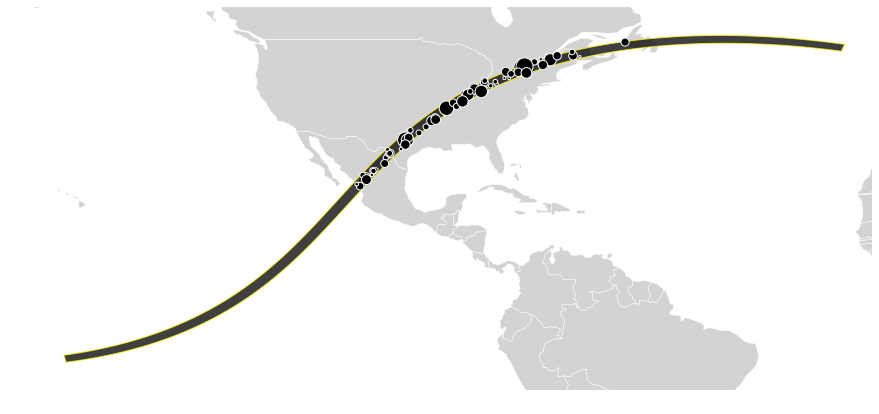

In [39]:
# Our city dots can be sized as a proportion of any value in the table, like population
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,10))
my_eclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.75)
e_cities.plot(ax=base, color='black', edgecolor='white', markersize=cities['POP']/1000)
bounds = my_eclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

In [40]:
print('Wow! There are {} cities in the eclipse path!'.format(len(e_cities)))
print("Here are the largest 5:")
print(e_cities.sort_values('POP', ascending = False)['NAME'].head(5))

Wow! There are 73 cities in the eclipse path!
Here are the largest 5:
6269    Dallas/Ft. Worth
6368            Montréal
5967           Cleveland
5962         San Antonio
5446        Indianapolis
Name: NAME, dtype: object


In [41]:
top_five = e_cities.sort_values('POP', ascending = False)[:5]

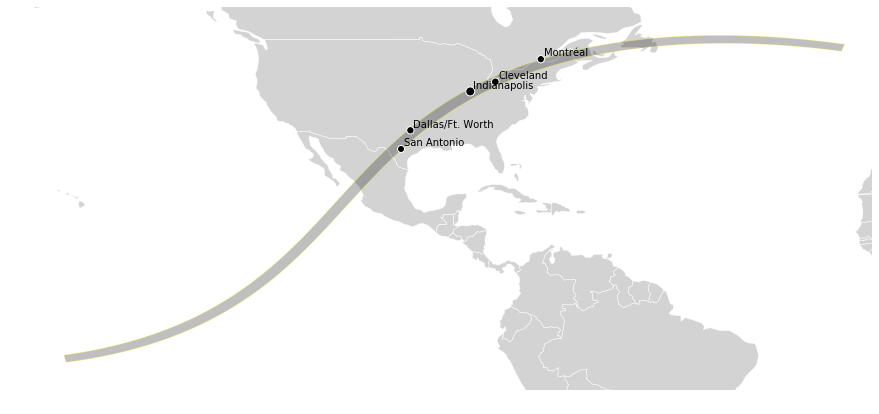

In [42]:
base = world.plot(color='lightgray', linewidth=0.5, edgecolor='white', figsize=(15,10))
my_eclipse.plot(ax=base, color='black', edgecolor='yellow', alpha=0.25)
top_five.plot(ax=base, color='black', edgecolor='white', markersize=cities['POP']/400)
for x, y, label in zip(top_five.geometry.x, top_five.geometry.y, top_five.NAME):
    base.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
bounds = my_eclipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
base.set_axis_off()

# Bonus: Make it Slippy

## [Folium](https://python-visualization.github.io/folium/)

#### Binds the power of Python with leaflet.js

In [43]:
import folium

In [44]:
Cleveland = [41.4993, -81.6944]

osm_map = folium.Map(location=Cleveland, zoom_start=10)
osm_map

In [45]:
map_stamen_toner = folium.Map(
    location=Cleveland,
    tiles='stamentoner',
    zoom_start=10
)
map_stamen_toner

In [46]:
map_stamen_water = folium.Map(
    location=Cleveland,
    tiles='stamenwatercolor',
    zoom_start=10
)
map_stamen_water

In [47]:
# Let's find the centroid of the eclipse we chose, so that we can center our folium map on it
x = my_eclipse.centroid.x.values[0]
y = my_eclipse.centroid.y.values[0]
print('y: ' + str(y) + ', x: ' + str(x))

y: 26.719700290214362, x: -93.295094820787


In [48]:
map_stamen_water = folium.Map(
    location=[y,x],
    tiles='stamenwatercolor',
    zoom_start=3
)

folium.GeoJson(top_five,name='Eclipse Cities').add_to(map_stamen_water)
folium.GeoJson(my_eclipse,name='Eclipse Path').add_to(map_stamen_water)

folium.LayerControl().add_to(map_stamen_water)

In [49]:
map_stamen_water

In [50]:
# You can write a function that creates a map with all of your properties
# This one creates popups for your cities

def plot_city_pop(top_five, myeclipse):
    # generate a new map
    folium_map = folium.Map(location=[y, x], zoom_start=3, tiles="stamenwatercolor")
    folium.GeoJson(my_eclipse,name='Eclipse Path').add_to(folium_map)
    # for each row in the data, add a cicle marker
    for index, row in top_five.iterrows():
        
        # generate the popup message that is shown on click.
        popup_text = "Name: {}<br> Pop: {}"
        popup_text = popup_text.format(row["NAME"], row["POP"])
        
        folium.CircleMarker(location=
                            (row['geometry'].y, row['geometry'].x),
                            radius=6,popup=popup_text,fill=True).add_to(folium_map)        

    # Add a layer control if you like
    folium.LayerControl().add_to(folium_map)
    
    return folium_map

In [51]:
# Call the function to create the map
final_map = plot_city_pop(top_five, my_eclipse)
final_map

In [52]:
# Save the results as a HTML file for easy sharing
final_map.save('mymap.html')

<h1>Happy Mapping!</h1>

In [53]:
plot_city_pop(e_cities, my_eclipse)